# Analysis 5

## Plotting map of collision, injury and death throughout all boroughs

In [1]:
import matplotlib.pyplot as plt #importing the required libraries
import matplotlib.patches as mpatches
import seaborn as sns
import pandas as pd

In [2]:
from pandas import Series, DataFrame
rawdata = pd.read_csv('ProcessedData\\NYPD_Motor_Vehicle_Collisions.csv') #reading the raw data 
rawdata[:5]

C:\Users\mites\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,04/04/2017,0:00,BROOKLYN,11206,40.700830,-73.933140,"(40.70083, -73.93314)",EVERGREEN AVENUE,NOLL STREET,NaN,...,NaN,NaN,NaN,NaN,3646753,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
1,04/04/2017,0:00,BROOKLYN,11221,40.698307,-73.923256,"(40.698307, -73.923256)",NaN,NaN,1353 MYRTLE AVENUE,...,Unspecified,NaN,NaN,NaN,3646754,PASSENGER VEHICLE,TAXI,NaN,NaN,NaN
2,04/04/2017,0:00,BROOKLYN,11225,40.663334,-73.960236,"(40.663334, -73.960236)",NaN,NaN,57 EMPIRE BOULEVARD,...,Unspecified,NaN,NaN,NaN,3645240,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
3,04/04/2017,0:00,MANHATTAN,10002,40.714440,-73.990390,"(40.71444, -73.99039)",NaN,NaN,28 CANAL STREET,...,Unspecified,NaN,NaN,NaN,3645679,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
4,04/04/2017,0:00,MANHATTAN,10030,40.816830,-73.939430,"(40.81683, -73.93943)",NaN,NaN,100 WEST 139 STREET,...,Following Too Closely,NaN,NaN,NaN,3645093,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN


### Plotting the different borough and its data

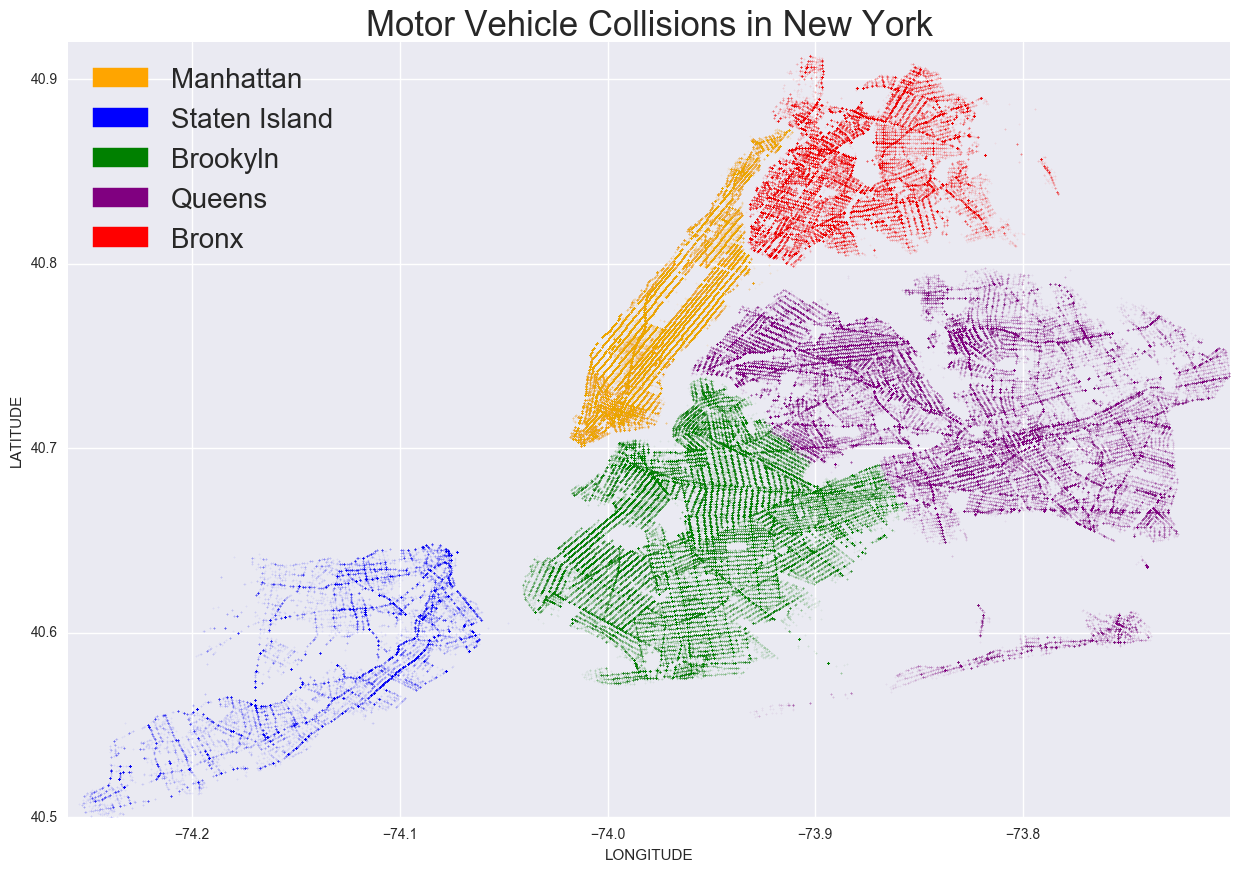

In [3]:
plt.figure(figsize=(15,10))
manhattan = rawdata[rawdata['BOROUGH'] == 'MANHATTAN'] #selecting the manhattan data
brooklyn = rawdata[rawdata['BOROUGH'] == 'BROOKLYN'] #selecting the brookyln data
bronx = rawdata[rawdata['BOROUGH'] == 'BRONX'] #selecting the bronx data
queens = rawdata[rawdata['BOROUGH'] == 'QUEENS'] #selecting the queens data
staten = rawdata[rawdata['BOROUGH'] == 'STATEN ISLAND'] # selecting the staten island data

plt.scatter(manhattan.LONGITUDE,manhattan.LATITUDE, alpha = 0.05, s = 4, color = 'orange', marker='.') # plotting the locations using longitude and latitude
plt.scatter(brooklyn.LONGITUDE,brooklyn.LATITUDE, alpha = 0.05, s = 4, color = 'green', marker='.')
plt.scatter(bronx.LONGITUDE,bronx.LATITUDE, alpha = 0.05, s = 4, color = 'red', marker='.')
plt.scatter(queens.LONGITUDE,queens.LATITUDE, alpha = 0.05, s = 4, color = 'purple', marker='.')
plt.scatter(staten.LONGITUDE,staten.LATITUDE, alpha = 0.05, s = 4, color = 'blue', marker='.')

orange_patch = mpatches.Patch(label='Manhattan', color = 'orange') #defining the legends to be put in the map
blue_patch = mpatches.Patch(label='Staten Island', color = 'blue')
green_patch = mpatches.Patch(label='Brookyln', color = 'green')
yellow_patch = mpatches.Patch(label='Queens', color = 'purple')
red_patch = mpatches.Patch(label='Bronx', color = 'red')
plt.legend([orange_patch,blue_patch,green_patch,yellow_patch,red_patch], ('Manhattan','Staten Island','Brookyln','Queens','Bronx'), loc='upper left' ,prop={'size':20})

plt.title('Motor Vehicle Collisions in New York', size=25) # plotting the graph below
plt.xlim((-74.26,-73.7)) #setting the limits of the latitude
plt.ylim((40.5,40.92)) #setting the limits of the longitude
plt.xlabel('LONGITUDE') #setting the labels
plt.ylabel('LATITUDE')
plt.savefig('borough.png') #saving the plot as a PNG image
plt.show()

### Plotting death, injury and just collision between 2015 - 2017 (current date)

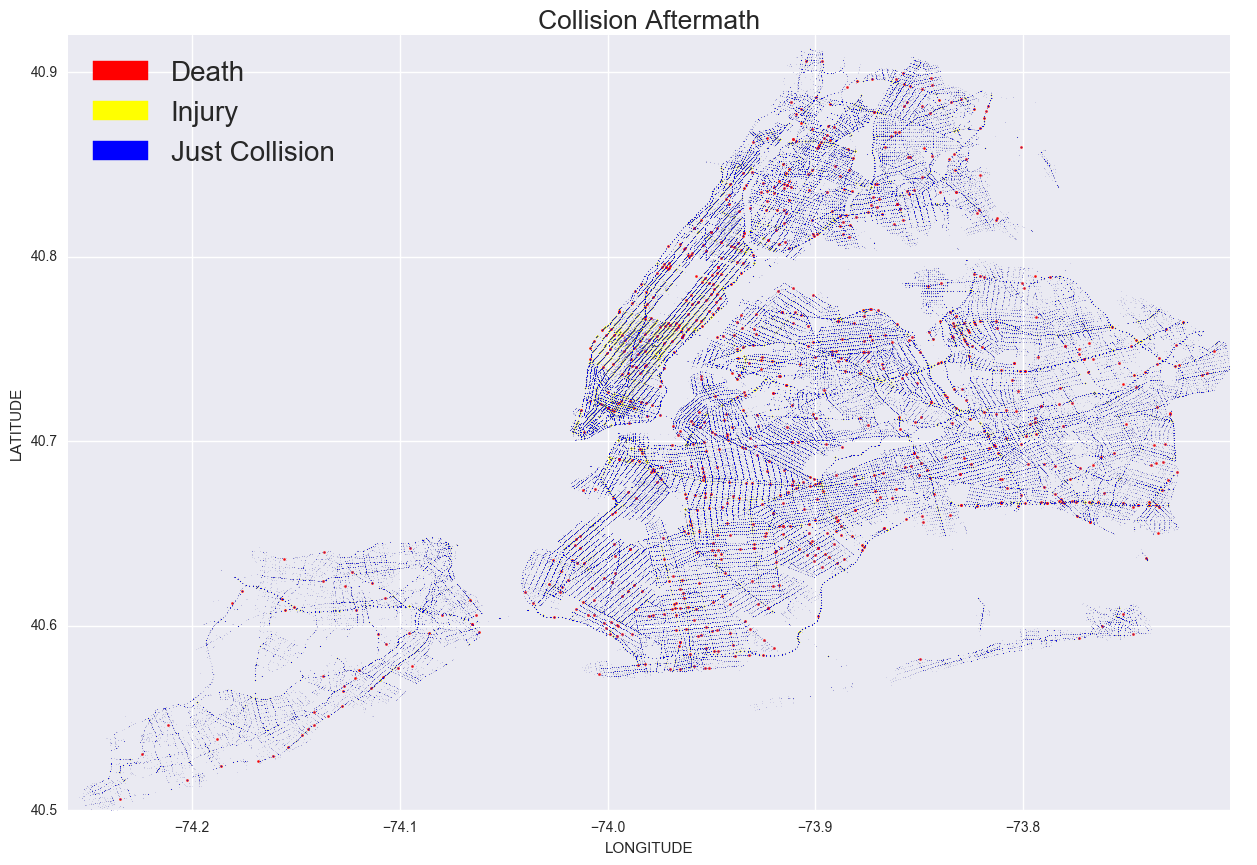

In [4]:
plt.figure(figsize=(15,10))

persons_killed = rawdata[rawdata['NUMBER OF PERSONS KILLED']+rawdata['NUMBER OF PEDESTRIANS KILLED']+rawdata['NUMBER OF CYCLIST KILLED']+rawdata['NUMBER OF MOTORIST KILLED']!=0] # calculating total persons killed and storing it in a variable
persons_injured = rawdata[rawdata['NUMBER OF PERSONS INJURED']+rawdata['NUMBER OF PEDESTRIANS INJURED']+rawdata['NUMBER OF CYCLIST INJURED']+rawdata['NUMBER OF MOTORIST INJURED']==0] #total for injured people
just_collision = rawdata[rawdata['NUMBER OF PERSONS KILLED']+rawdata['NUMBER OF PEDESTRIANS KILLED']+rawdata['NUMBER OF CYCLIST KILLED']+rawdata['NUMBER OF MOTORIST KILLED']
                        +rawdata['NUMBER OF PERSONS INJURED']+rawdata['NUMBER OF PEDESTRIANS INJURED']+rawdata['NUMBER OF CYCLIST INJURED']+rawdata['NUMBER OF MOTORIST INJURED']==0] # total for just collisions

plt.scatter(persons_killed.LONGITUDE,persons_killed.LATITUDE, s = 9, color = 'red', marker='.') #specifying the longitude, color and the marker type
plt.scatter(persons_injured.LONGITUDE,persons_injured.LATITUDE, alpha = 0.03, s = 2, color = 'yellow', marker='.')
plt.scatter(just_collision.LONGITUDE,just_collision.LATITUDE, alpha = 0.09, s = 1, color = 'blue', marker='.')

red_patch = mpatches.Patch(label='Death', color = 'red') #specifying data for the legends
yellow_patch = mpatches.Patch(label='Injury', color = 'yellow')
blue_patch = mpatches.Patch(label='Just Collision', color = 'blue')
plt.legend([red_patch,yellow_patch,blue_patch], ('Death','Injury','Just Collision'), loc='upper left' ,prop={'size':20})

plt.title('Collision Aftermath', size=19)
plt.xlim((-74.26,-73.7)) #setting the figure limit
plt.ylim((40.5,40.92))
plt.xlabel('LONGITUDE')
plt.ylabel('LATITUDE')
plt.savefig('collision.png') #saving the plot as PNG image
plt.show()